###### pip install missingno

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import missingno as msno

In [2]:
train = pd.read_csv('/Users/mariananeto/Downloads/project_data/train_data.csv')
test = pd.read_csv('/Users/mariananeto/Downloads/project_data/test_data.csv')

train.head()

/var/folders/pw/sbpycr1d17b1j4255gwjl17c0000gn/T/ipykernel_82145/2844617493.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('/Users/mariananeto/Downloads/project_data/train_data.csv')


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [12]:
train.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'Claim Injury Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender',
       'IME-4 Count', 'Industry Code', 'Industry Code Description',
       'Medical Fee Region', 'OIICS Nature of Injury Description',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
       'Agreement Reached', 'WCB Decision', 'Number of Dependents'],
      dtype='object')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

In [18]:
train.select_dtypes(include=np.number).columns

Index(['Age at Injury', 'Average Weekly Wage', 'Birth Year',
       'Claim Identifier', 'IME-4 Count', 'Industry Code',
       'OIICS Nature of Injury Description', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code',
       'Agreement Reached', 'Number of Dependents'],
      dtype='object')

In [4]:
train.isna().sum()

Accident Date                          23134
Age at Injury                          19445
Alternative Dispute Resolution         19445
Assembly Date                              0
Attorney/Representative                19445
Average Weekly Wage                    48096
Birth Year                             48523
C-2 Date                               34005
C-3 Date                              406226
Carrier Name                           19445
Carrier Type                           19445
Claim Identifier                           0
Claim Injury Type                      19445
County of Injury                       19445
COVID-19 Indicator                     19445
District Name                          19445
First Hearing Date                    442673
Gender                                 19445
IME-4 Count                           460668
Industry Code                          29403
Industry Code Description              29403
Medical Fee Region                     19445
OIICS Natu

<Axes: >

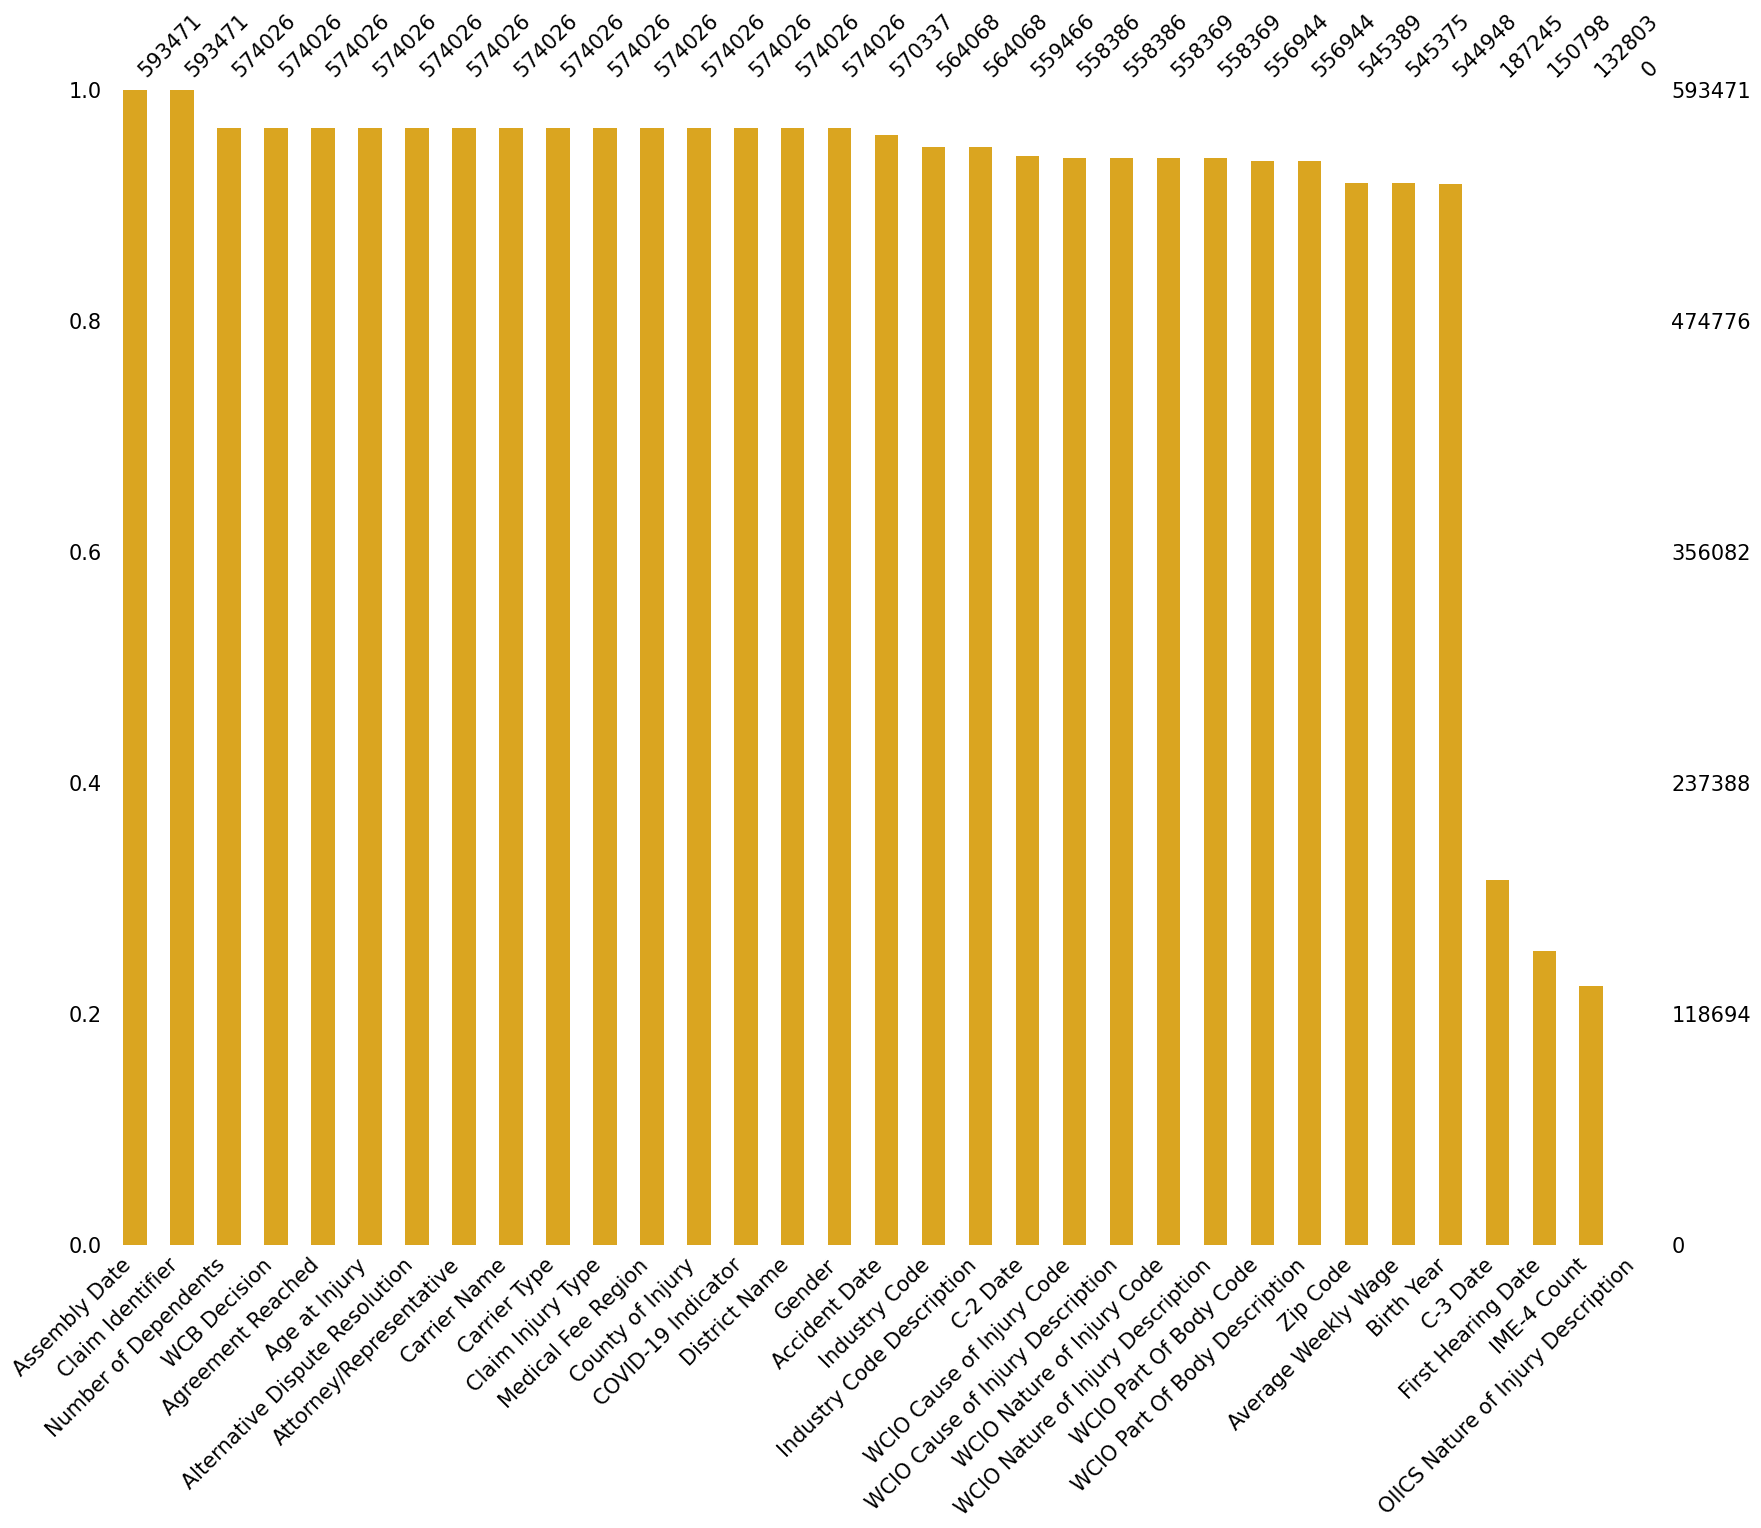

In [8]:
msno.bar(train, figsize=(20, 15), fontsize=15, color="goldenrod", sort="descending")

<Axes: >

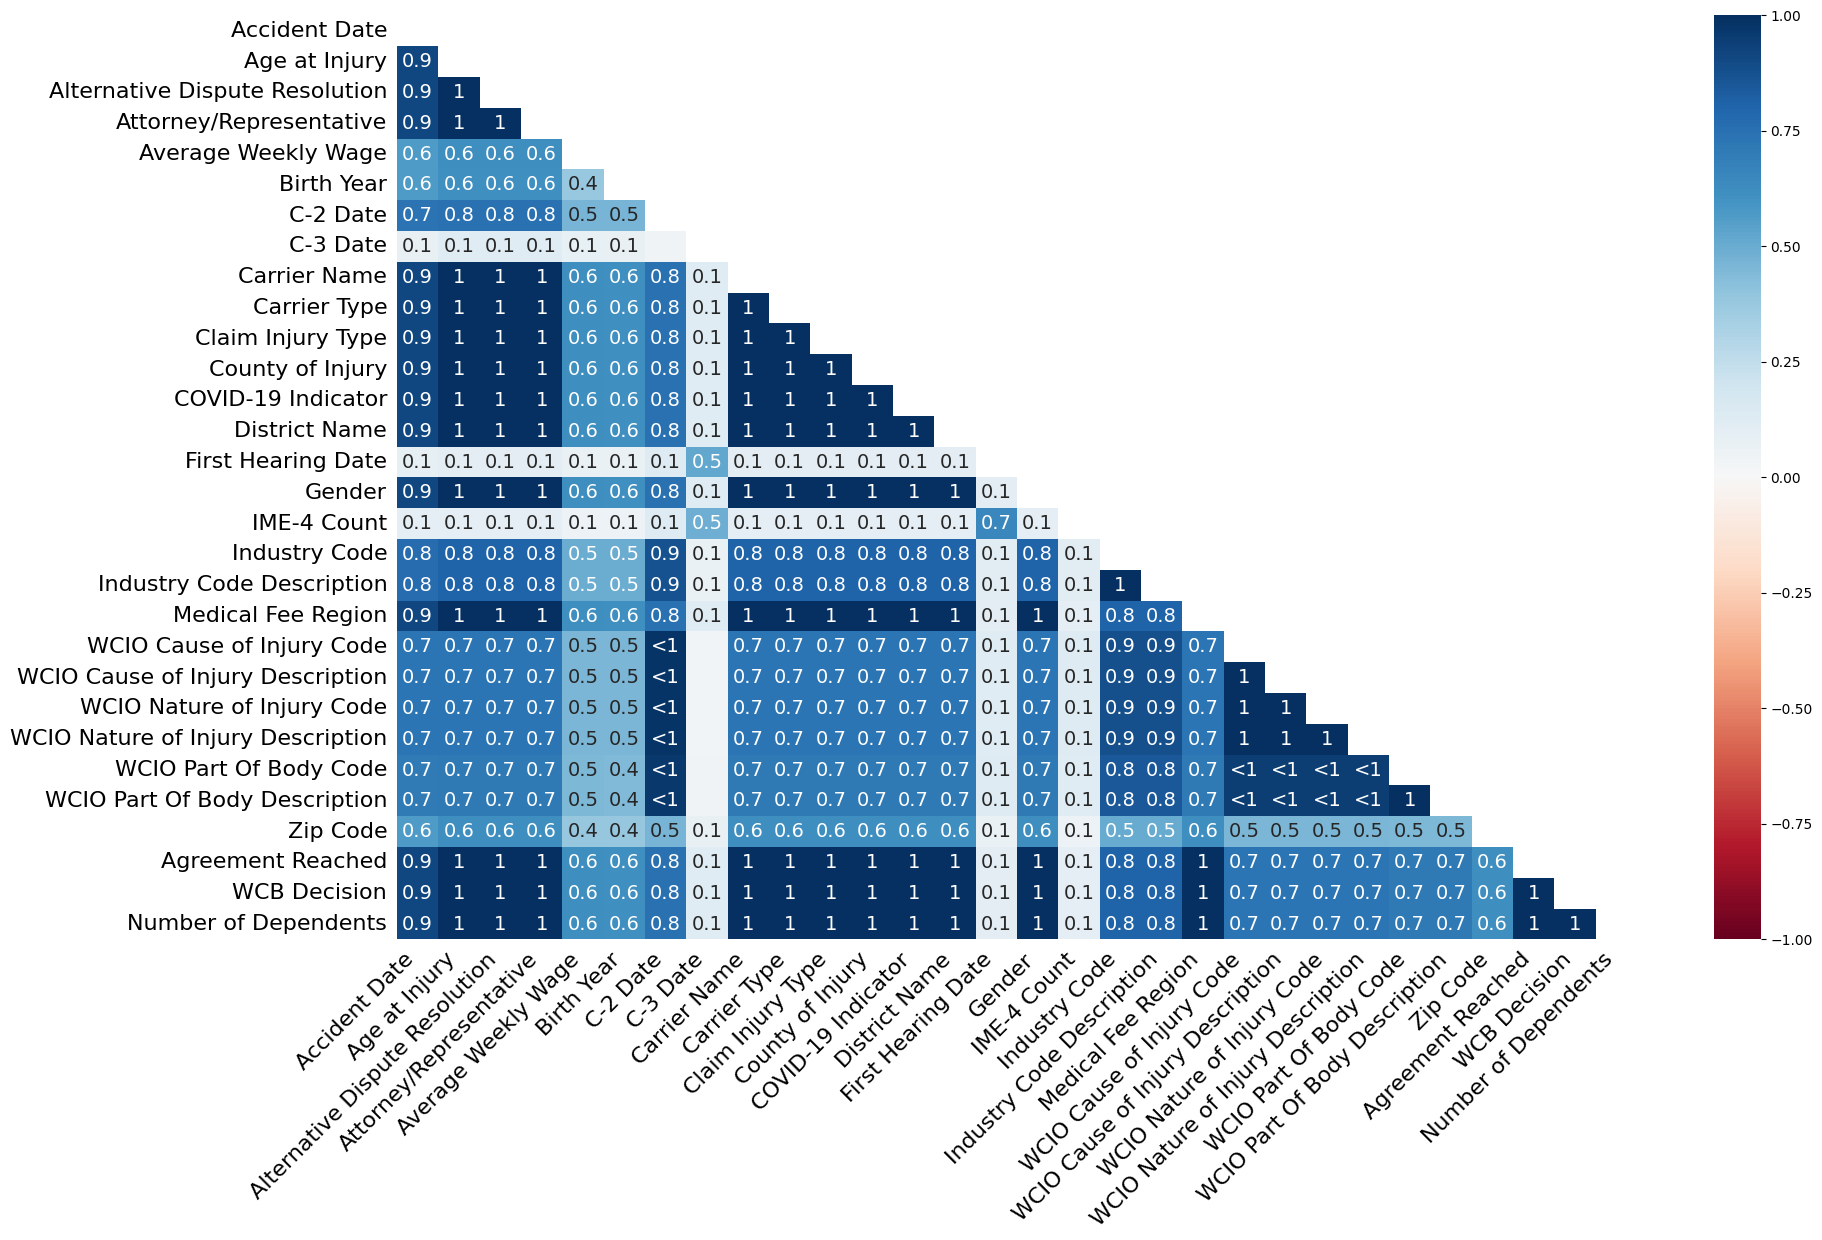

In [9]:
msno.heatmap(train)

In [22]:
# create list of numerical column

train['Age'] = 2024 - train['Birth Year']
num_col = train.select_dtypes(include=np.number).columns


In [23]:
#put all the valuues of birth year that are equal to 0 to NA

train['Birth Year'] = train['Birth Year'].replace(0, np.nan)



In [24]:
train[num_col].describe()


,Age at Injury,Average Weekly Wage,Birth Year,Claim Identifier,IME-4 Count,Industry Code,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents,Age
count,574026.000000,5.453750e+05,519867.000000,5.934710e+05,132803.000000,564068.000000,0.0,558386.000000,558369.000000,556944.000000,574026.000000,574026.000000,544948.000000
mean,42.114270,4.910883e+02,1977.794767,2.366760e+07,3.207337,58.645305,NaN,54.381143,41.013839,39.738146,0.046665,3.006559,137.232396
std,14.256432,6.092918e+03,13.834332,1.079271e+08,2.832303,19.644175,NaN,25.874281,22.207521,22.365940,0.210921,2.000801,414.644423
min,0.000000,0.000000e+00,1900.000000,5.393066e+06,1.000000,11.000000,NaN,1.000000,1.000000,-9.000000,0.000000,0.000000,6.000000
25%,31.000000,0.000000e+00,1966.000000,5.593414e+06,1.000000,45.000000,NaN,31.000000,16.000000,33.000000,0.000000,1.000000,35.000000
50%,42.000000,0.000000e+00,1978.000000,5.791212e+06,2.000000,61.000000,NaN,56.000000,49.000000,38.000000,0.000000,3.000000,47.000000
75%,54.000000,8.410000e+02,1989.000000,5.991000e+06,4.000000,71.000000,NaN,75.000000,52.000000,53.000000,0.000000,5.000000,59.000000
max,117.000000,2.828079e+06,2018.000000,9.998917e+08,73.000000,92.000000,NaN,99.000000,91.000000,99.000000,1.000000,6.000000,2024.000000


In [25]:
train['Claim Identifier'].value_counts().max()
# findd the most frequent value in the column
claimDateMode = train['Claim Identifier'].mode()

In [26]:
#find where train['Claim Identifier'] is equal to the mode
claimDateModeIndex = list(train[train['Claim Identifier'] == claimDateMode [0]].index)


In [27]:
claimDateModeIndex

[257901, 526445]

In [36]:
#chek if row number 257901 and 526445 are equal 
for i in train.columns:
    l_loop =  pd.Series(train.iloc[claimDateModeIndex][i])
    l_loop_count =len(l_loop)
    equal = False
    if l_loop_count > 1:
        if l_loop.isnull().values.any():
            l_loop_nan = l_loop.isnull().sum()
            if l_loop_nan == l_loop_count:
               equal = True
    if equal == False:
        print(l_loop)
    print(equal)


# both rows are epty execpt for the claim identifier and the date 
# we can drop them



True
True
True
257901    2021-05-21
526445    2022-09-05
Name: Assembly Date, dtype: object
False
True
True
True
True
True
True
True
257901    292668076
526445    292668076
Name: Claim Identifier, dtype: int64
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [37]:
train.drop(claimDateModeIndex, inplace=True)